<a href="https://colab.research.google.com/github/VeraKutyavina/ml-tasks/blob/main/knp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def init_graph(n):
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            if np.random.randint(0, 2) == 1:
                matrix[i][j] = matrix[j][i] = np.random.randint(0, 100)
    return matrix

In [7]:
def draw_graph(grapth):
  plt.figure(figsize=(12, 8))
  pos = nx.spring_layout(grapth, seed=7)
  nx.draw_networkx_nodes(grapth, pos)
  nx.draw_networkx_edges(grapth, pos)
  edge_labels = nx.get_edge_attributes(grapth, "weight")
  nx.draw_networkx_edge_labels(grapth, pos, edge_labels)
  plt.show()

In [10]:
def get_nearest_node(matrix, nodes):
  result = [-1,-1]
  min_d = 1000000
  for node in nodes:
    for i in range(len(matrix[node])):
      if matrix[node][i] == 0:
        continue
      if matrix[node][i] < min_d:
        min_d = matrix[node][i]
        result = [node,i]
  for node in nodes:
    matrix[node][result[1]] = matrix[result[1]][node] = 0
  return result, min_d

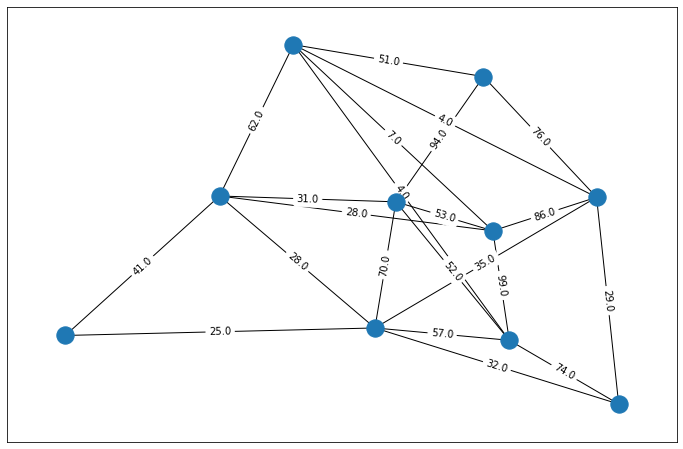

In [20]:
n = 10
matrix = init_graph(n)
G = nx.from_numpy_matrix(matrix)
draw_graph(G)

[0, 5] 51.0
[5, 2] 4.0
[5, 9] 4.0
[5, 1] 7.0
[1, 7] 28.0
[7, 6] 28.0
[6, 8] 25.0
[2, 3] 29.0
[7, 4] 31.0
[-1, -1] 1000000


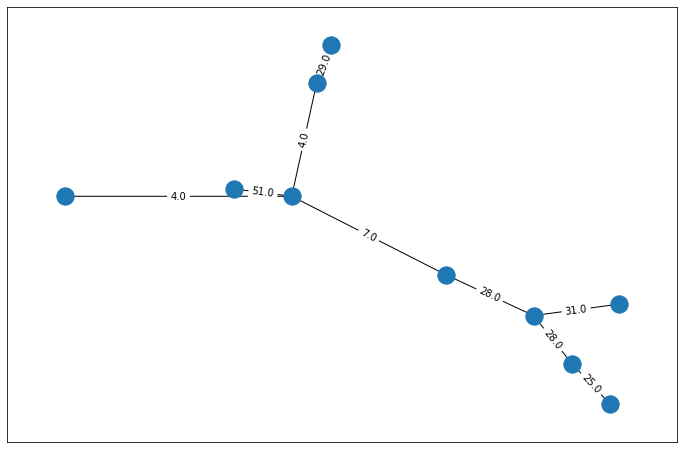

In [21]:
min_tree = nx.Graph()
visited_nodes = [0]
unvisited_nodes = np.arange(start=0, stop=10, step=1).tolist()

while len(unvisited_nodes) != 0:
  nearest_node, min_d = get_nearest_node(matrix, visited_nodes)
  print(nearest_node, min_d)
  if nearest_node[0] == -1:
    break
  new_node = nearest_node[1]
  visited_nodes.append(new_node)
  unvisited_nodes.remove(new_node)

  min_tree.add_edge(*nearest_node, weight=min_d)

draw_graph(min_tree)